In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
%load_ext line_profiler
%load_ext memory_profiler

In [3]:
module = fc.eightb.preselection.t8btag_minmass.Run2_UL18

In [4]:
data = ObjIter([Tree(module.JetHT_Data_UL_List, altfile='t8btag_minmass_{base}')])
bkg = ObjIter([Tree(module.QCD_B_List+module.TTJets,altfile='t8btag_minmass_{base}')])

100%|██████████| 17/17 [00:11<00:00,  1.50it/s]


100%|██████████| 1/1 [00:37<00:00, 37.97s/it]


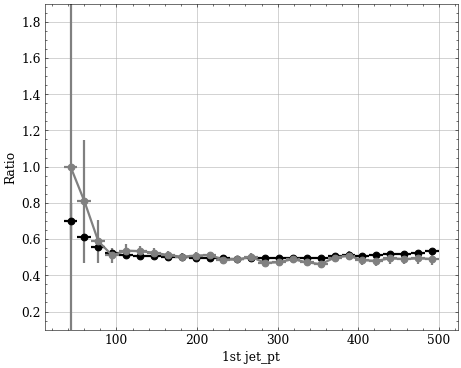

In [21]:
study.quick( 
    data+data+bkg+bkg, stacked=False,
    masks=[None,lambda t:t.jet_btag[:,0]>jet_btagWP[1]]*len(data+bkg),
    # h_color=None, h_linestyle='-',
    varlist=['jet_pt[:,0]'],
    binlist=[(0,500,30)],

    histo=False,
    ratio=True, r_inv=True,
    r_group=[(0,1),(2,3)],
    # overlay=True,
)

100%|██████████| 1/1 [00:37<00:00, 37.20s/it]


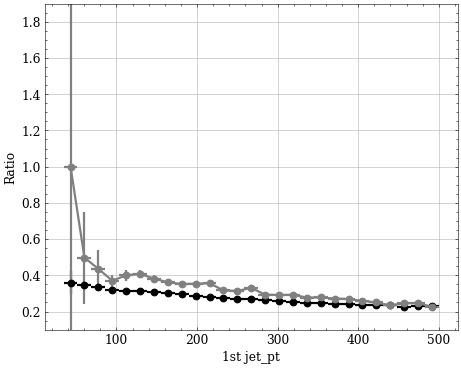

In [22]:
study.quick( 
    data+data+bkg+bkg, stacked=False,
    masks=[None,lambda t:t.jet_btag[:,0]>jet_btagWP[2]]*len(data+bkg),
    # h_color=None, h_linestyle='-',
    varlist=['jet_pt[:,0]'],
    binlist=[(0,500,30)],

    histo=False,
    ratio=True, r_inv=True,
    r_group=[(0,1),(2,3)],
    # overlay=True,
)

100%|██████████| 1/1 [00:36<00:00, 36.40s/it]


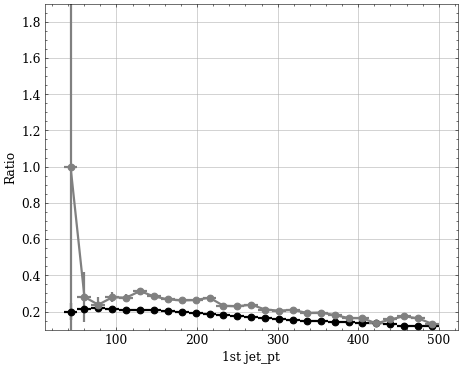

In [23]:
study.quick( 
    data+data+bkg+bkg, stacked=False,
    masks=[None,lambda t:t.jet_btag[:,0]>jet_btagWP[3]]*len(data+bkg),
    # h_color=None, h_linestyle='-',
    varlist=['jet_pt[:,0]'],
    binlist=[(0,500,30)],

    histo=False,
    ratio=True, r_inv=True,
    r_group=[(0,1),(2,3)],
    # overlay=True,
)

100%|██████████| 1/1 [00:04<00:00,  4.99s/it]


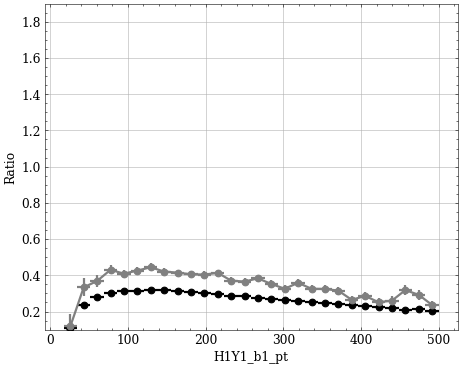

In [27]:
ratios = obj_store()
study.quick( 
    data+data+bkg+bkg, stacked=False,
    masks=[None,lambda t:t.H1Y1_b1_btag>jet_btagWP[3]]*len(data+bkg),
    # h_color=None, h_linestyle='-',
    varlist=['H1Y1_b1_pt'],
    binlist=[(0,500,30)],

    histo=False,
    ratio=True, r_inv=True,
    r_group=[(0,1),(2,3)],
    r_store=ratios,
    # overlay=True,
)

In [30]:
r_data, r_bkg = ratios[0]

In [35]:
h1y1_b1_tight_sf = Ratio(r_data, r_bkg)

(<Figure size 650x650 with 1 Axes>, <AxesSubplot:>)

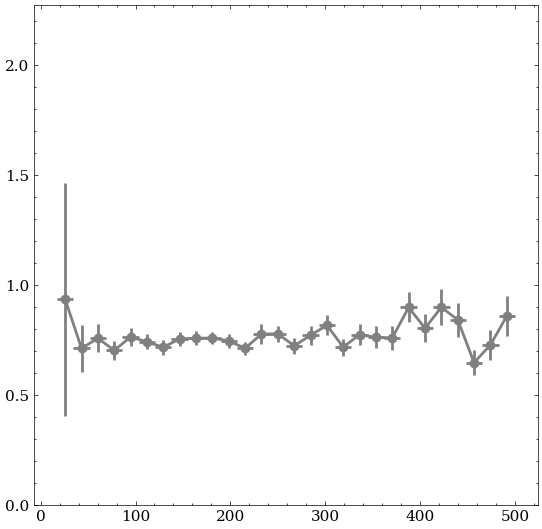

In [37]:
plot_graph(h1y1_b1_tight_sf)

In [43]:
h1y1_b1_tight_sf_reweight = lambda t : ak.where( t.H1Y1_b1_btag>jet_btagWP[3], h1y1_b1_tight_sf.evaluate(t.H1Y1_b1_pt), 1 )

100%|██████████| 1/1 [00:05<00:00,  5.16s/it]


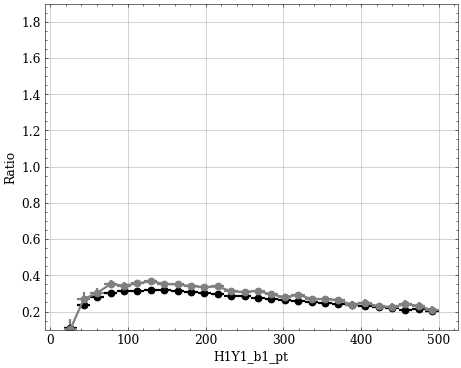

In [44]:
study.quick( 
    data+data+bkg+bkg, stacked=False,
    masks=[None,lambda t:t.H1Y1_b1_btag>jet_btagWP[3]]*len(data+bkg),
    scale=[None]*2+[h1y1_b1_tight_sf_reweight]*2,
    # h_color=None, h_linestyle='-',
    varlist=['H1Y1_b1_pt'],
    binlist=[(0,500,30)],

    histo=False,
    ratio=True, r_inv=True,
    r_group=[(0,1),(2,3)],
    # overlay=True,
)

100%|██████████| 1/1 [00:01<00:00,  1.72s/it]


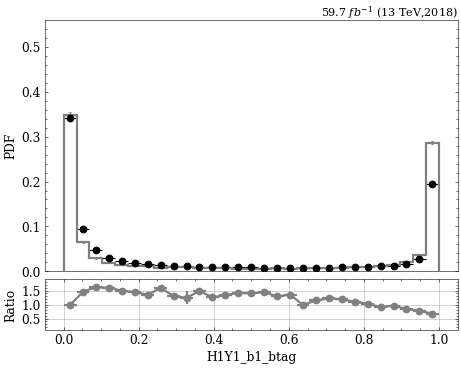

In [62]:
r_store = obj_store()
study.quick( 
    data+bkg, stacked=False,
    # h_color=None, h_linestyle='-',
    varlist=['H1Y1_b1_btag'],
    binlist=[(0,1,30)],
    efficiency=True,

    # histo=False,
    ratio=True,
    r_group=[(0,1)],
    r_store=r_store
    # overlay=True,
)

In [63]:
h1y1_b1_btag_shape_sf = r_store[0][0]

In [64]:
h1y1_b1_btag_shape_reweight = lambda t:h1y1_b1_btag_shape_sf.evaluate(t.H1Y1_b1_btag)

100%|██████████| 1/1 [00:01<00:00,  1.88s/it]


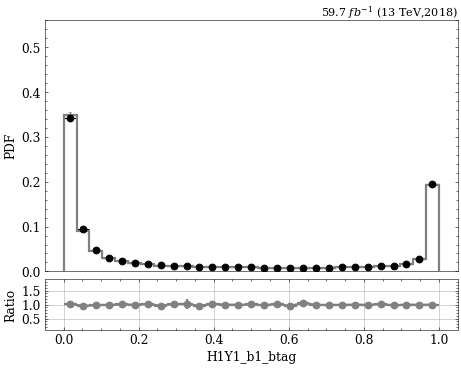

In [65]:
study.quick( 
    data+bkg, stacked=False,
    # h_color=None, h_linestyle='-',
    scale=[None,h1y1_b1_btag_shape_reweight],
    varlist=['H1Y1_b1_btag'],
    binlist=[(0,1,30)],
    efficiency=True,

    # histo=False,
    ratio=True, r_inv=True,
    r_group=[(0,1)],
    r_store=r_store
    # overlay=True,
)

100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


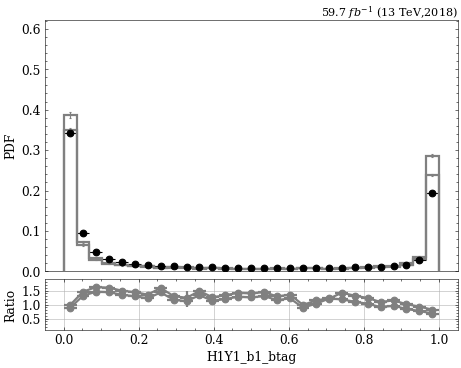

In [68]:
study.quick( 
    data+bkg+bkg, stacked=False,
    scale=[None,None, h1y1_b1_tight_sf_reweight],
    # h_color=None, h_linestyle='-',
    varlist=['H1Y1_b1_btag'],
    binlist=[(0,1,30)],
    efficiency=True,

    # histo=False,
    ratio=True, 
    # r_group=[(0,1)],
    # r_store=r_store
    # overlay=True,
)